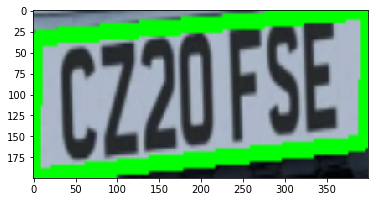

In [44]:
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance as dist

def crop_image(source):
    img = cv2.imread(source, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (600,400) )

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    gray = cv2.bilateralFilter(gray, 13, 15, 15) 

    edged = cv2.Canny(gray, 30, 200) 
    contours = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(contours)
    contours = sorted(contours, key = cv2.contourArea, reverse = True)[:10]
    screenCnt = None

    for c in contours:

        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.018 * peri, True)

        if len(approx) == 4:
            screenCnt = approx
            break

    if screenCnt is None:
        detected = 0
        print ("No contour detected")
        return img, img
    else:
         detected = 1

    if detected == 1:
        cv2.drawContours(img, [screenCnt], -1, (0, 255, 0), 3)

    mask = np.zeros(gray.shape,np.uint8)
    new_image = cv2.drawContours(mask,[screenCnt],0,255,-1,)
    new_image = cv2.bitwise_and(img,img,mask=mask)

    (x, y) = np.where(mask == 255)
    (topx, topy) = (np.min(x), np.min(y))
    (bottomx, bottomy) = (np.max(x), np.max(y))
    Cropped = img[topx:bottomx+1, topy:bottomy+1]

    img = cv2.resize(img,(500,300))
    Cropped = cv2.resize(Cropped,(400,200))
    return img, Cropped

if __name__ == '__main__':
    src = './example.png'
    img, cropped = crop_image(src)
#     cv2.imshow('cropped', cropped)
    plt.imshow(cropped)
#     plt.imshow(img)

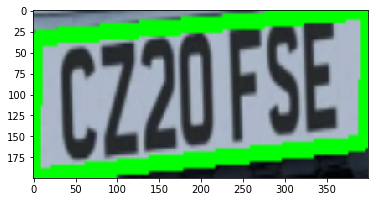

In [25]:
img, cropped = crop_image('./example.png')
plt.imshow(img)
plt.imshow(cropped)

No contour detected


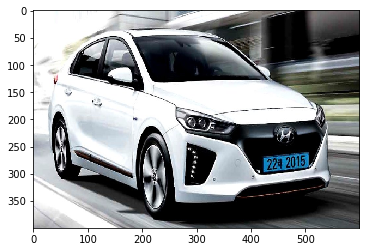

In [26]:
img, cropped = crop_image('./example2.jpeg')
plt.imshow(img)
plt.imshow(cropped)

In [68]:
def label(image, contour):
    colors = [[255,255,0], [255, 255, 255], [0, 0, 255]]
    colorNames = ["yellow", "white", "blue"]
    mask = np.zeros(image.shape[:2], dtype="uint8")
#     cv2.drawContours(mask, [contour], -1, 255, -1)

    mask = cv2.erode(mask, None, iterations=2)
    mean = cv2.mean(image, mask=mask)[:3]
    minDist = (np.inf, None)

    for (i, row) in enumerate(lab):
        d = dist.euclidean(row[0], mean)
        if d < minDist[0]:
            minDist = (d, i)
    return colorNames[minDist[1]]

In [69]:
def crop_and_label(source):
    img = cv2.imread(source, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (600,400) )

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    gray = cv2.bilateralFilter(gray, 13, 15, 15) 

    edged = cv2.Canny(gray, 30, 200) 
    contours = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(contours)
    contours = sorted(contours, key = cv2.contourArea, reverse = True)[:10]
    screenCnt = None

    for c in contours:

        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.018 * peri, True)

        if len(approx) == 4:
            screenCnt = approx
            break

    if screenCnt is None:
        detected = 0
        print ("No contour detected")
        return img, img
    else:
         detected = 1

    if detected == 1:
        cv2.drawContours(img, [screenCnt], -1, (255, 0, 0), 3)
        col = label(img, screenCnt)

    mask = np.zeros(gray.shape,np.uint8)
    new_image = cv2.drawContours(mask,[screenCnt],0,255,-1,)
    new_image = cv2.bitwise_and(img,img,mask=mask)

    (x, y) = np.where(mask == 255)
    (topx, topy) = (np.min(x), np.min(y))
    (bottomx, bottomy) = (np.max(x), np.max(y))
    Cropped = img[topx:bottomx+1, topy:bottomy+1]

    img = cv2.resize(img,(500,300))
    Cropped = cv2.resize(Cropped,(400,200))
    return img, Cropped, col

blue


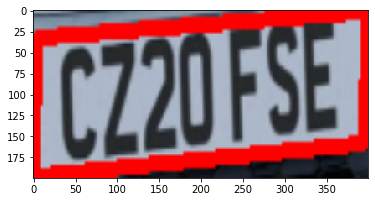

In [70]:
img, cropped, result = crop_and_label('./example.png')
print(result)
plt.imshow(img)
plt.imshow(cropped)

blue


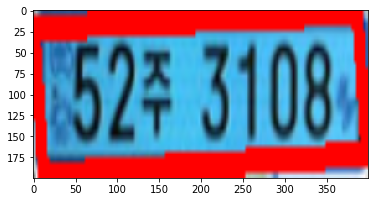

In [71]:
img, cropped, result = crop_and_label('./example.jpeg')
print(result)
plt.imshow(img)
plt.imshow(cropped)

In [61]:
import cv2
import imutils
import numpy as np
# import pytesseract
# pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files (x86)\Tesseract-OCR\tesseract.exe'

img = cv2.imread('./example.png',cv2.IMREAD_COLOR)
img = cv2.resize(img, (600,400) )

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
gray = cv2.bilateralFilter(gray, 13, 15, 15) 

edged = cv2.Canny(gray, 30, 200) 
contours = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)
contours = sorted(contours, key = cv2.contourArea, reverse = True)[:10]
screenCnt = None

for c in contours:
    
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.018 * peri, True)
 
    if len(approx) == 4:
        screenCnt = approx
        break

if screenCnt is None:
    detected = 0
    print ("No contour detected")
else:
     detected = 1

if detected == 1:
    cv2.drawContours(img, [screenCnt], -1, (0, 255, 0), 3)

mask = np.zeros(gray.shape,np.uint8)
new_image = cv2.drawContours(mask,[screenCnt],0,255,-1,)
new_image = cv2.bitwise_and(img,img,mask=mask)

(x, y) = np.where(mask == 255)
(topx, topy) = (np.min(x), np.min(y))
(bottomx, bottomy) = (np.max(x), np.max(y))
Cropped = img[topx:bottomx+1, topy:bottomy+1]

# text = pytesseract.image_to_string(Cropped, config='--psm 11')
# print("programming_fever's License Plate Recognition\n")
# print("Detected license plate Number is:",text)
img = cv2.resize(img,(500,300))
Cropped = cv2.resize(Cropped,(400,200))
# plt.imshow(img)
# plt.imshow(Cropped)
# cv2.imshow('car',img)
# cv2.imshow('Cropped',Cropped)

# cv2.waitKey(0)
# cv2.destroyAllWindows()

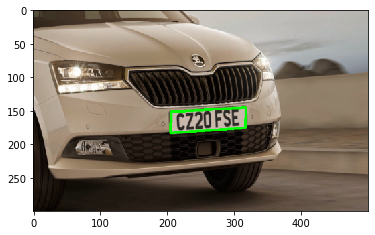

In [62]:
plt.imshow(img)

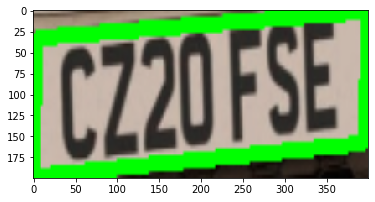

In [63]:
plt.imshow(Cropped)

In [65]:
hsvFrame = cv2.cvtColor(Cropped, cv2.COLOR_BGR2HSV)
blue_lower = np.array([94, 80, 2], np.uint8)
blue_upper = np.array([120, 255, 255], np.uint8)
blue_mask = cv2.inRange(hsvFrame, blue_lower, blue_upper)

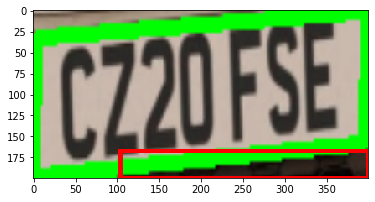

In [68]:
contours, hierarchy = cv2.findContours(blue_mask,
                                       cv2.RETR_TREE,
                                       cv2.CHAIN_APPROX_SIMPLE)
for pic, contour in enumerate(contours):
    area = cv2.contourArea(contour)
    if(area > 300):
        x, y, w, h = cv2.boundingRect(contour)
        imageFrame = cv2.rectangle(Cropped, (x, y),
                                   (x + w, y + h),
                                   (255, 0, 0), 2)

plt.imshow(imageFrame)

In [83]:
import cv2
import imutils
import numpy as np
# import pytesseract
# pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files (x86)\Tesseract-OCR\tesseract.exe'

img = cv2.imread('./example2.jpeg',cv2.IMREAD_COLOR)
img = cv2.resize(img, (600,400) )

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
gray = cv2.bilateralFilter(gray, 13, 15, 15) 

edged = cv2.Canny(gray, 30, 200) 
contours = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)
contours = sorted(contours, key = cv2.contourArea, reverse = True)[:10]
screenCnt = None

for c in contours:
    
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.018 * peri, True)
 
    if len(approx) == 4:
        screenCnt = approx
        break

if screenCnt is None:
    detected = 0
    print ("No contour detected")
else:
     detected = 1

if detected == 1:
    cv2.drawContours(img, [screenCnt], -1, (0, 255, 0), 3)

mask = np.zeros(gray.shape,np.uint8)
new_image = cv2.drawContours(mask,[screenCnt],0,255,-1,)
new_image = cv2.bitwise_and(img,img,mask=mask)

(x, y) = np.where(mask == 255)
(topx, topy) = (np.min(x), np.min(y))
(bottomx, bottomy) = (np.max(x), np.max(y))
Cropped = img[topx:bottomx+1, topy:bottomy+1]

# text = pytesseract.image_to_string(Cropped, config='--psm 11')
# print("programming_fever's License Plate Recognition\n")
# print("Detected license plate Number is:",text)
img = cv2.resize(img,(500,300))
Cropped = cv2.resize(Cropped,(400,200))
# plt.imshow(img)
# plt.imshow(Cropped)
# cv2.imshow('car',img)
# cv2.imshow('Cropped',Cropped)

# cv2.waitKey(0)
# cv2.destroyAllWindows()

No contour detected


error: OpenCV(4.4.0) /private/var/folders/nz/vv4_9tw56nv9k3tkvyszvwg80000gn/T/pip-req-build-ucld1hvm/opencv/modules/imgproc/src/drawing.cpp:2598: error: (-215:Assertion failed) reader.ptr != NULL in function 'cvDrawContours'


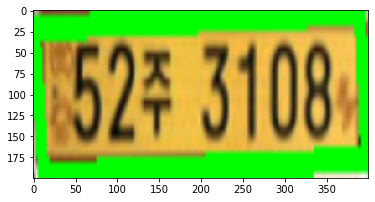

In [84]:
plt.imshow(Cropped)

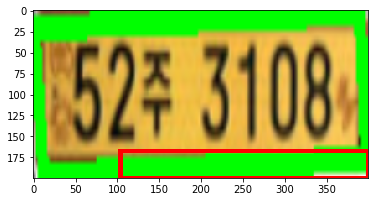

In [74]:
contours, hierarchy = cv2.findContours(blue_mask,
                                       cv2.RETR_TREE,
                                       cv2.CHAIN_APPROX_SIMPLE)
for pic, contour in enumerate(contours):
    area = cv2.contourArea(contour)
    if(area > 300):
        x, y, w, h = cv2.boundingRect(contour)
        imageFrame = cv2.rectangle(Cropped, (x, y),
                                   (x + w, y + h),
                                   (255, 0, 0), 2)

plt.imshow(imageFrame)

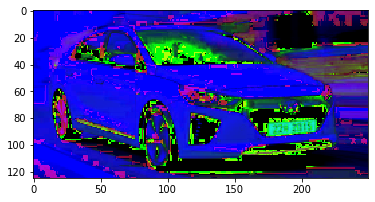

In [57]:
img = cv2.imread('./ex2.jpeg', cv2.COLOR_RGB2HSV)
img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
plt.imshow(img)

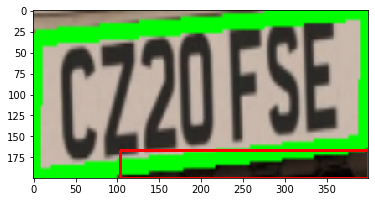

In [64]:
# hsv_nemo = cv2.cvtColor(nemo, cv2.COLOR_RGB2HSV)
contours, hierarchy = cv2.findContours(blue_mask,
                                       cv2.RETR_TREE,
                                       cv2.CHAIN_APPROX_SIMPLE)
for pic, contour in enumerate(contours):
    area = cv2.contourArea(contour)
    if(area > 300):
        x, y, w, h = cv2.boundingRect(contour)
        imageFrame = cv2.rectangle(Cropped, (x, y),
                                   (x + w, y + h),
                                   (255, 0, 0), 2)

#         cv2.putText(Cropped, "Blue Colour", (x, y), 1.0, (255, 0, 0))
plt.imshow(imageFrame)